In [2]:
%matplotlib inline
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import keras as k
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
data=pd.read_csv('training_set_rel3.tsv',encoding='ISO-8859-1')

In [3]:
data=data[data['essay_set']<7]

In [4]:
data=data.reset_index()

# Vocabulary 

In [9]:
vocab=pd.read_csv('glove.6B/vocab.csv')

In [10]:
vocab=vocab.drop(vocab.columns[0],axis=1)

In [11]:
vocab=vocab.drop(vocab.columns[1],axis=1)

In [13]:
vocab.index=vocab.index+1

## Dictionary 

In [64]:
word_id={}
for i in range(len(vocab)):
    word_id[vocab.loc[i+1,'word']]=i+1
    

In [62]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
#stemming=PorterStemmer()

            
def doc_to_id(h):
    l=[]
    m=[]
    a=nltk.tokenize.word_tokenize(h)
    for w in a:
        try:
            n1=lemmatizer.lemmatize(w.lower())
            #n=stemming.stem(n1)
            l.append(word_id[n1])
        except:
                m.append(w.lower())
    return l,m

In [ ]:
doc_to_id('my name is hardik')

# Essay to Id

In [266]:
data1=pd.DataFrame(data['essay'])
data1['domain_score']=data['domain1_score']

In [267]:
word_id1=[]
wrong_word=[]
for i in range(len(data1)):
    p,q=doc_to_id(data1['essay'][i])
    word_id1.append(p)
    wrong_word.append(q)

In [268]:
seq_length=[len(word_id1[i]) for i in range(len(word_id1))]

#  Study of sequence length of essays

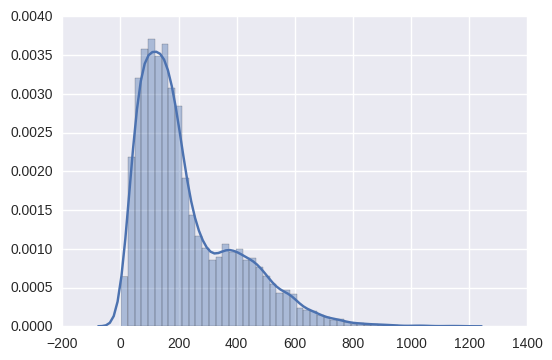

In [269]:
sns.distplot(seq_length)

In [270]:
data1['seq_length']=seq_length

In [271]:
#Removing essays who have length greater than 550
data1=data1[data1['seq_length']<550]

In [272]:
data1=data1.reset_index()

In [273]:
word_id1=[]
wrong_word=[]
for i in range(len(data1)):
    p,q=doc_to_id(data1['essay'][i])
    word_id1.append(p)
    wrong_word.append(q)

In [274]:
seq_length=[len(word_id1[i]) for i in range(len(word_id1))]

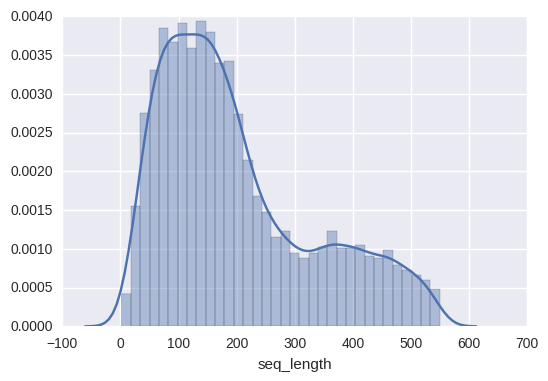

In [276]:
sns.distplot(data1['seq_length'])

In [288]:
data1.drop(data.index[8936],inplace=True)

## Removing other columns

In [283]:
data1=data1[~data1['domain_score'].isnull()]

In [290]:
data1=data1.reset_index()

In [291]:
word_id1=[]
wrong_word=[]
for i in range(len(data1)):
    p,q=doc_to_id(data1['essay'][i])
    word_id1.append(p)
    wrong_word.append(q)

In [292]:
seq_length=[len(word_id1[i]) for i in range(len(word_id1))]

# Padding for Seq2Seq model and make suitable output for softmax layer 

In [299]:
input1=pad_sequences(word_id1,maxlen=550,padding='post')

In [296]:
output=k.utils.np_utils.to_categorical(data1['domain_score'],nb_classes=13)

# Save Final Data 

In [302]:
np.save('Essay grader/input',input1)

In [303]:
np.save('Essay grader/output',output)